In [ ]:
#Developed by Faraz S. Tehrani
#Deltares, 2020

In [ ]:
# pip install joblib

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

# from sklearn.externals import joblib
import joblib

In [ ]:
def evaluateTrainedModel(model, X_eval, y_eval):
  predictions = model.predict(X_eval)
  accuracy = accuracy_score(y_eval, predictions)
  other_metrics = precision_recall_fscore_support(y_eval, predictions)
  precision = other_metrics[0][0]
  recall = other_metrics[1][0]
  f1_score= other_metrics[2][0]
  confusion = pd.DataFrame(confusion_matrix(y_eval, predictions))
  print('Confusion matrix = \n', confusion)
  return accuracy, precision, recall, f1_score


def saveMLModel(model, path, fileName):  
  joblib.dump(model, path+fileName) #.sav extension

def loadMLModel(path, modelName):
  return joblib.load(path+modelName)

In [ ]:
#read files from google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
pathToFolder = "/content/drive/My Drive/LandslideDetection/"
df = pd.read_csv(pathToFolder+'df4ML.csv')

NameError: ignored

In [1]:
df.head()

NameError: ignored

In [ ]:
df['Landslide_Region']=df['segment_id'].apply(lambda x: x.split('_')[0])

In [ ]:
df.columns

Index(['segment_id', 'area_m2', 'east', 'north', 'b4', 'b3', 'b2', 'b8',
       'ndvi', 'ndvi_change', 'ratio_rg_change', 'brightness',
       'brightness_change', 'gndvi', 'slope_max', 'slope_mean', 'nd_std',
       'height_mean', 'height_min', 'height_max', 'Type', 'Landslide_Region'],
      dtype='object')

In [ ]:
#rename columns
df = df.rename(columns={'ndvi':'NDVI', 'ndvi_change':'VDI', 'ratio_rg_change':'RGD', 'brightness':'BR',
       'brightness_change':'BRD', 'gndvi':'GNDVI', 'nd_std':'NDVI_std','b4':'B4', 'b3':'B3', 'b2':'B2', 'b8':'B8'})
df = df[['segment_id', 'Landslide_Region','area_m2', 'east', 'north',
         'B2','B3','B4','B8','NDVI','NDVI_std','GNDVI','VDI','BR', 'BRD',
         'height_mean', 'height_min', 'height_max','slope_max', 'slope_mean',
         'Type']]

In [ ]:
df.columns

Index(['segment_id', 'Landslide_Region', 'area_m2', 'east', 'north', 'B2',
       'B3', 'B4', 'B8', 'NDVI', 'NDVI_std', 'GNDVI', 'VDI', 'BR', 'BRD',
       'height_mean', 'height_min', 'height_max', 'slope_max', 'slope_mean',
       'Type'],
      dtype='object')

**Feature Analysis**

In [ ]:
feat=['B2',
       'B3', 'B4', 'B8', 'NDVI', 'NDVI_std', 'GNDVI', 'VDI', 'BR', 'BRD',
       'height_mean', 'height_min', 'height_max', 'slope_max', 'slope_mean']
df_fa=df[feat]

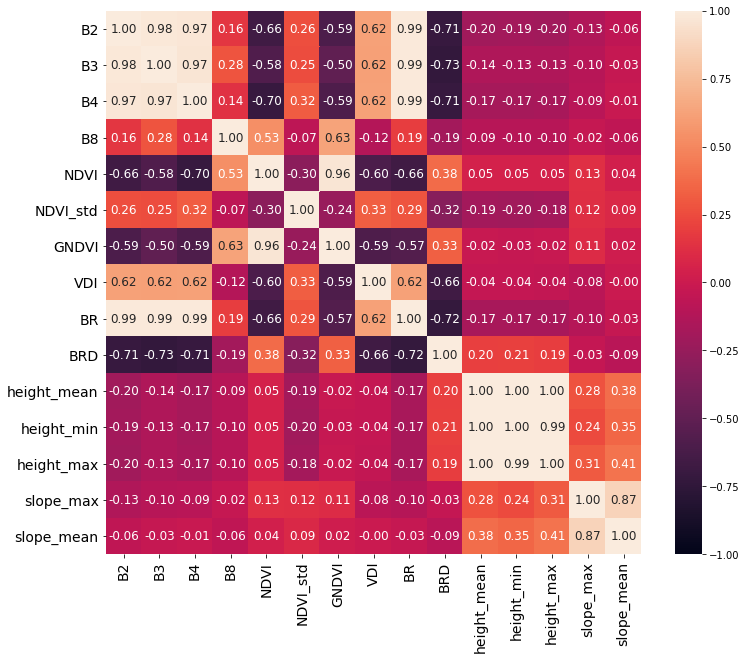

In [ ]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df_fa.corr(), vmin=-1, vmax=1, fmt='.2f', annot=True,annot_kws={"size": 12})
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig(pathToFolder+'heatmap_model1.png', dpi=600, bbox_inches='tight')


In [ ]:
df = df[df['Landslide_Region']!='L2']

In [ ]:
feat2=['B8', 'NDVI', 'NDVI_std', 'VDI', 'BR', 'BRD', 'height_mean', 'slope_max']

## **Model based on feat2**

In [ ]:
X = df[feat2]
y = df['Type']

random_state = 110

In [ ]:
# Split and Scale the data

# Split and Scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

scaler2 = StandardScaler()
scaler2.fit(X_train)
X_train = scaler2.transform(X_train)
X_test = scaler2.transform(X_test)
y_train = y_train
y_test = y_test

In [ ]:
len(df)

450

In [ ]:
#Random forest classifier
# define the baseline model
baselineModel = RandomForestClassifier(random_state=random_state)        

**Hyper-parameters tunning**

In [ ]:
# Hyper-parameters
#RF
model_parameters_RF = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50, 100, 500],
    'max_features': [2],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100, 200, 500, 1000]
}
#Cross-Validation
# Instantiate the grid search model
model_parameters=model_parameters_RF
grid_search = GridSearchCV(estimator=baselineModel, param_grid=model_parameters,
                           cv=5, n_jobs=4, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print ('best model parameters: \n', grid_search.best_params_)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 12.5min


best model parameters: 
 {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


[Parallel(n_jobs=4)]: Done 2250 out of 2250 | elapsed: 15.8min finished


**Evaulate the model**

In [ ]:
#Evaluate the best model
best_model2 = grid_search.best_estimator_
print ('\n**Train set**')
accuracy, precision, recall, f1_score = evaluateTrainedModel(best_model2, X_train, y_train)
print('best model on train set: \n accuracy = {:6.2f},\n precision = {:6.2f},\n recall = {:6.2f},\n f1_score = {:6.2f} '.format(accuracy, precision, recall, f1_score ))

print ('\n**Test set**')
accuracy, precision, recall, f1_score = evaluateTrainedModel(best_model2, X_test, y_test)
print('best model on test set: \n accuracy = {:6.2f},\n precision = {:6.2f},\n recall = {:6.2f},\n f1_score = {:6.2f} '.format(accuracy, precision, recall, f1_score ))       


**Train set**
Confusion matrix = 
      0    1
0  213    0
1    2  145
best model on train set: 
 accuracy =   0.99,
 precision =   0.99,
 recall =   1.00,
 f1_score =   1.00 

**Test set**
Confusion matrix = 
     0   1
0  53   2
1   2  33
best model on test set: 
 accuracy =   0.96,
 precision =   0.96,
 recall =   0.96,
 f1_score =   0.96 


**feature importance**

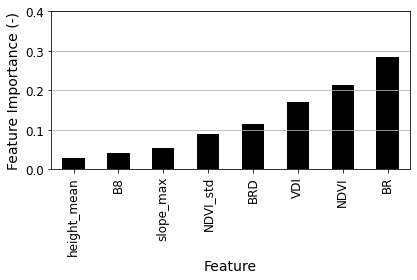

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance

for feature, importance in zip(X.columns, best_model2.feature_importances_ ):
    feats[feature] = importance #add the name/value pair 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'feature importance'})

importances.sort_values(by='feature importance').plot(kind='bar',rot=90, color='black', legend= False, fontsize= 12,align="center")

plt.xlabel('Feature',size=14)
plt.ylabel('Feature Importance (-)',size=14)
plt.ylim((0,0.4))
plt.gca().yaxis.grid(True, which='major') 
plt.tight_layout()
plt.savefig(pathToFolder+'featImportance_model1-2.png',dpi=600)

**save model**

In [ ]:
model_name = 'RF_model1-2_noL2.sav'
saveMLModel(best_model2,pathToFolder,model_name)

**load model**

In [ ]:
model_name = 'RF_model1-2_noL2.sav'
model = loadMLModel(pathToFolder,model_name)

In [ ]:
#check
accuracy, precision, recall, f1_score = evaluateTrainedModel(model, X_test, y_test)
print('model 1-2 on test set: \n accuracy = {:6.2f},\n precision = {:6.2f},\n recall = {:6.2f},\n f1_score = {:6.2f} '.format(accuracy, precision, recall, f1_score )) 

Confusion matrix = 
     0   1
0  53   2
1   2  33
model 1-2 on test set: 
 accuracy =   0.96,
 precision =   0.96,
 recall =   0.96,
 f1_score =   0.96 
